# Data management

## Unsupervised Learning

## [Michel Coppée](https://www.uliege.be/cms/c_9054334/fr/repertoire?uid=u224042) & [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns; 
sns.set_theme()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')


/var/folders/cg/tgk7cwd906x_71j8jdd3gzc00000gn/T/ipykernel_37315/3040252040.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## Principal Component Analysis

In scikit-learn, PCA is implemented as a `transformer` object that learns $n$ components in its `fit` method, and can be used on new data to project it on these components

In [2]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

### Generate Data

In [3]:
#generate some data
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

In [4]:
X.shape

(100, 4)

In [5]:
#each feature will have zero mean
X = X - np.mean(X, axis=0)

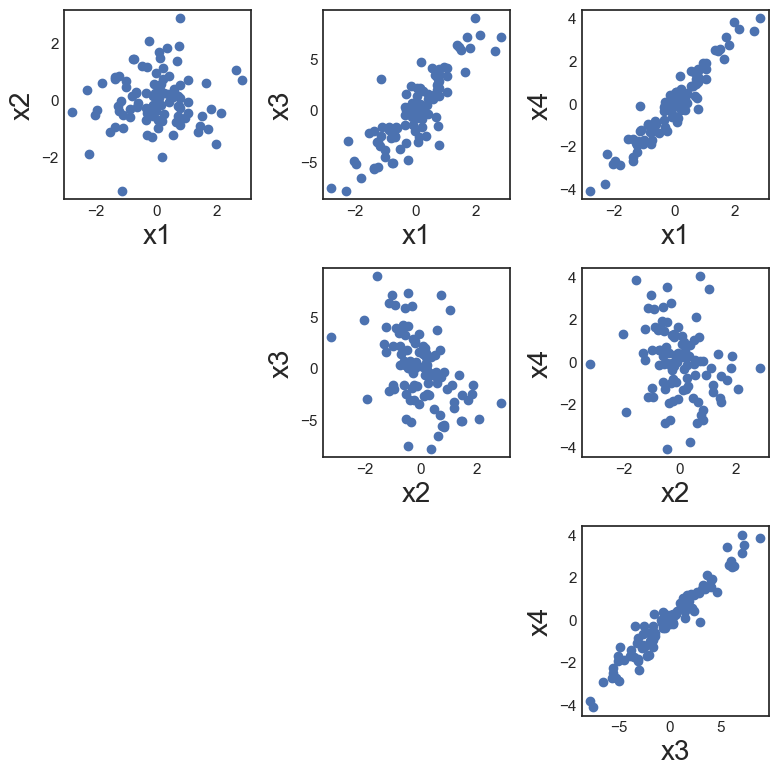

In [6]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i], X[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

#### Observations:
- x1 and x2 do not seem correlated
- x1 seems very correlated with both x3 and x4
- x2 seems somewhat correlated with both x3 and x4
- x3 and x4 seem very correlated

### PCA minimal working example

Note: `PCA` centers the input data automatically. To scale the variables so that they have a unit variance, you can use the optional parameter `whiten=True`. 

#### Get PCA Components

We use the `PCA` module from `sllearn` to form the Principal Components

Then, we can project the data into the new feature space.


In [7]:
#initialize; reduce to 3 features with PCA (from 4)
pca = PCA(n_components=3, whiten=True)

In [8]:
# # Fit and transform data
pca_features = pca.fit_transform(X)
pca_features[:5]

array([[ 0.0076479 ,  0.29203454, -0.49079626],
       [-1.48793624,  1.31648269,  0.73098191],
       [-1.6230985 , -0.16817677,  2.30495207],
       [-0.06914715, -0.58634101, -0.0715064 ],
       [-1.03927116, -0.93139407,  0.64406551]])

In [9]:
len(pca_features) # for each observation, we have the coordinates in 3D

100

In [10]:
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,0.007648,0.292035,-0.490796
1,-1.487936,1.316483,0.730982
2,-1.623098,-0.168177,2.304952
3,-0.069147,-0.586341,-0.071506
4,-1.039271,-0.931394,0.644066


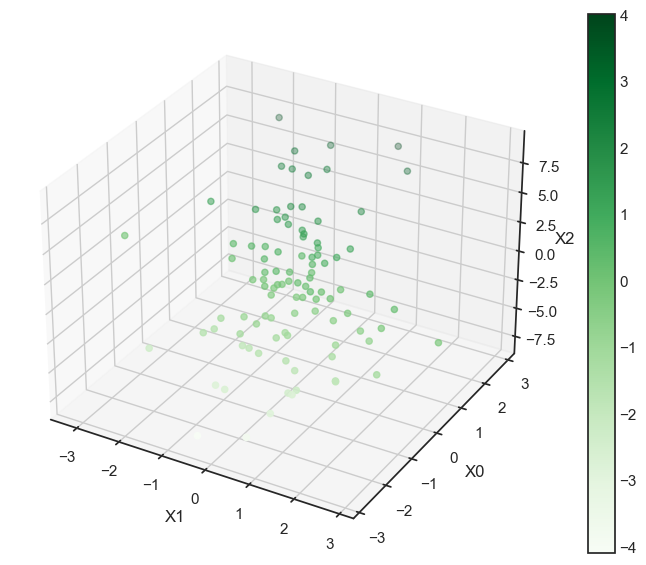

In [11]:
fig = plt.figure(figsize = (10, 7))

ax = plt.axes(projection="3d")
scatter_plot= ax.scatter(X[:,1], X[:,0], X[:,2], c=X[:,3], cmap='Greens');
plt.colorbar(scatter_plot)
ax.set_xlabel('X1')
ax.set_ylabel('X0')
ax.set_zlabel('X2')
ax.zaxis.labelpad=-0.8
plt.show()

### PCA model attribute plots

PCA components and their significance can be explained using following attributes

- **Explained variance** is the amount of variance explained by each of the selected components. This attribute is associated with the sklearn PCA model as `explained_variance_`

- **Explained variance ratio** is the percentage of variance explained by each of the selected components. It’s attribute is `explained_variance_ratio_`

In [12]:
pca.explained_variance_ 

array([1.58583796e+01, 1.09831645e+00, 9.40492959e-03])

In [13]:
pca.explained_variance_ratio_

array([9.34674181e-01, 6.47334756e-02, 5.54315451e-04])

#### `explained_variance_` plot

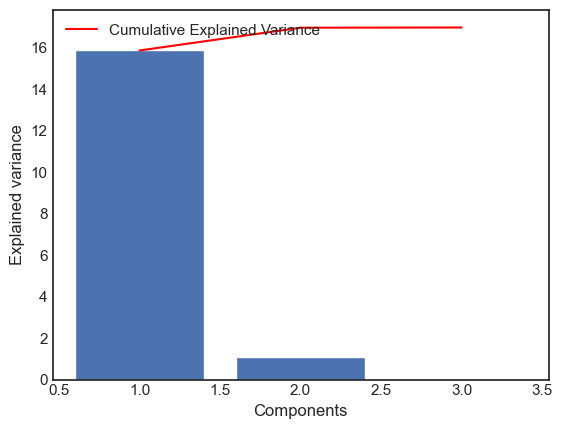

In [14]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

#### `explained_variance_ratio_` plot

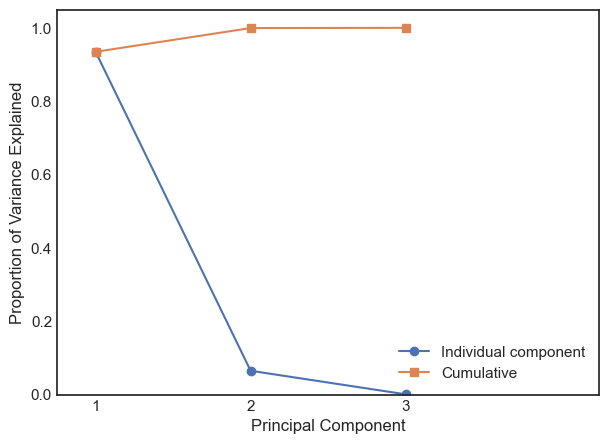

In [15]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3])
plt.legend();
plt.show()

#### 2D Scatter plot of PC1 and PC2

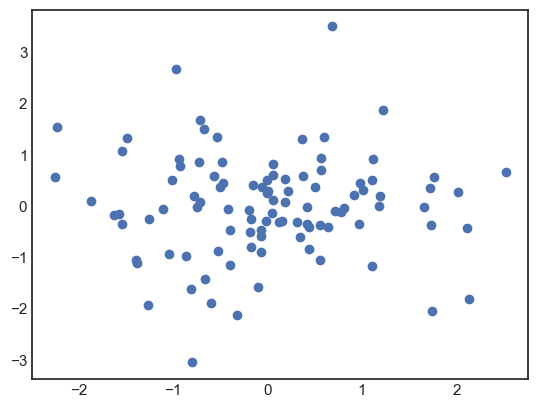

In [16]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])

#### 3D Scatter plot of PC1,PC2 and PC3

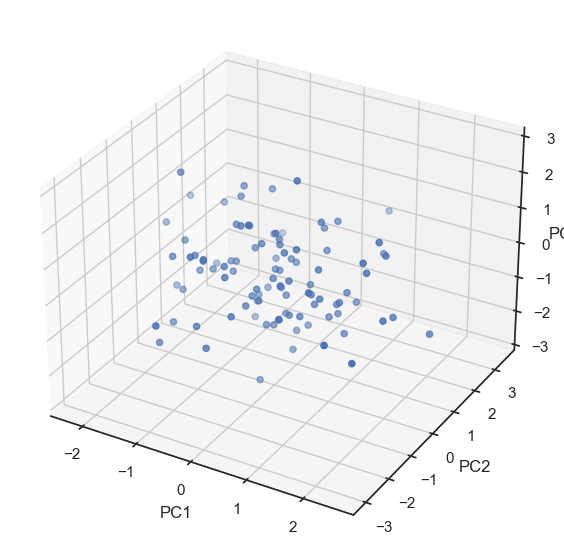

In [17]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")
scatter_plot= ax.scatter(pca_df['PC1'], pca_df['PC2'],pca_df['PC3']);
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.zaxis.labelpad=-0.8
plt.show()

In [18]:
#Make Plotly figure
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(x=pca_df['PC1'],
                    y=pca_df['PC2'],
                    z=pca_df['PC3'], color=pca_df['PC3'], opacity=0.7,
                    )
fig.update_layout(
    scene = dict(
                    xaxis_title='PC1',
                    yaxis_title='PC2',
                    zaxis_title='PC3'),
                    width=700,
margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [19]:
# Principal components correlation coefficients
loadings = pca.components_
loadings

array([[ 0.23168183, -0.09513739,  0.88212319,  0.39891238],
       [-0.47604959, -0.80165744,  0.18029394, -0.3133947 ],
       [ 0.19567219,  0.30181146,  0.36876007, -0.8571104 ]])

In [20]:
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = [0, 1, 2, 3]
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3
feature_names,,,
0,0.231682,-0.476050,0.195672
1,-0.095137,-0.801657,0.301811
2,0.882123,0.180294,0.368760
3,0.398912,-0.313395,-0.857110


#### Plotting the correlation coefficients (loadings) of each feature.

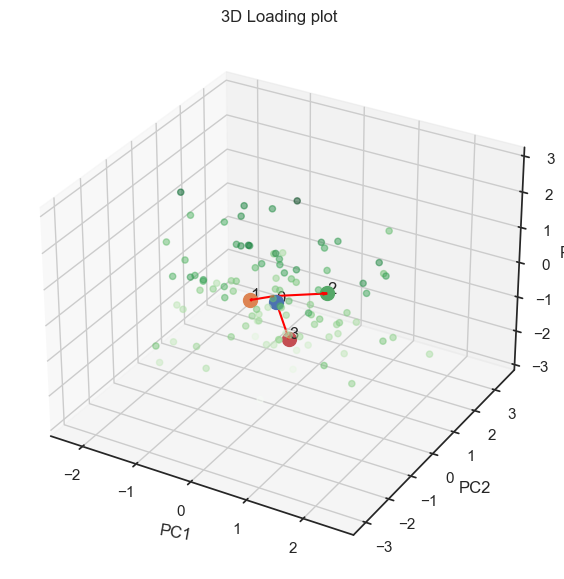

In [21]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]
 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")

scatter_plot= ax.scatter(pca_df['PC1'], pca_df['PC2'],pca_df['PC3'], 
    c=pca_df['PC3'],
    cmap='Greens', 
    alpha=0.5)

fig = px.scatter_3d(x=pca_df['PC1'],
                    y=pca_df['PC2'],
                    z=pca_df['PC3'], color=pca_df['PC3'], opacity=0.7,
                    )

# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=100)
    ax.text(xs[i], ys[i],zs[i], varnames)
    ax.quiver(0, 0, 0, xs[i], ys[i],zs[i], color='red',arrow_length_ratio=0.1)  

ax.set_xlabel('PC1', rotation=-10)
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Show plot
plt.title('3D Loading plot')
plt.show()

## `USAarrests` data


For each of the 50 states in the United States, the data set contains 
- the number of arrests per $100, 000$ residents 
- for each of three crimes: `Assault` ,` Murder` ,and `Rape` . 
- Other variable: `UrbanPop` (the % of the population in each state living in urban areas).

In [22]:
import os
parent_path=os.path.dirname(os.getcwd()) # os.getcwd() fetchs the current path, 
data_path=os.path.join(parent_path, 'data')
df = pd.read_csv(os.path.join(data_path, 'USArrests.csv'), index_col=0)
df.shape

(50, 4)

In [23]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Pre-processing
PCA should be performed after standardizing each variable to have mean zero and standard deviation one.

In [24]:
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [25]:
X.shape

(50, 4)

## 3D scattered points

<div class="alert alert-info">
<h3> Your turn: Plot the 3D scatterplot of the data, with color intensity for the fourth variable </h3>
</div>

In [26]:
#Make Plotly figure
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(x=X['Rape'],
                    y=X['Assault'],
                    z=X['Murder'], color=X['UrbanPop'], opacity=0.7,
                    )
fig.update_layout(
    scene = dict(
                xaxis_title='Rape',
                yaxis_title='Assault',
                zaxis_title='Murder'),
                width=700,
                margin=dict(l=0, r=0, b=0, t=0)
            )
fig.show()

<div class="alert alert-info">
<h3> Your turn:  </h3>

- Initialize a PCA with 4 components 
- `Fit` the PCA model and `transform` X to get the principal components 
- Compute the loading vectors 

</div>

In [27]:
pca = PCA(n_components=4, whiten=True)

In [28]:
pca_features=pca.fit_transform(X)

In [29]:
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
pca_df.head()

,PC1,PC2,PC3,PC4
Alabama,0.619515,1.127787,-0.736530,0.371466
Alaska,1.225833,1.067906,3.382016,-1.042565
Arizona,1.108303,-0.742268,0.090818,-1.984069
Arkansas,-0.088895,1.114259,0.189946,-0.434563
California,1.586543,-1.535304,0.992316,-0.812966


In [30]:
# The loading vectors
pca_loadings = pd.DataFrame(pca.components_.T, columns=['V1', 'V2', 'V3', 'V4'], )
pca_loadings

,V1,V2,V3,V4
0,0.535899,0.418181,-0.341233,0.649228
1,0.583184,0.187986,-0.268148,-0.743407
2,0.278191,-0.872806,-0.378016,0.133878
3,0.543432,-0.167319,0.817778,0.089024


<div class="alert alert-info">
<h3> Your turn: Plot the 3D scatterplot of the pca features </h3>
</div>

In [31]:
#Make Plotly figure
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(x=pca_df['PC1'],
                    y=pca_df['PC2'],
                    z=pca_df['PC3'], color=pca_df['PC4'], opacity=0.7,
)
fig.update_layout(
    scene = dict(
                xaxis_title='PC1',
                yaxis_title='PC2',
                zaxis_title='PC3'),
                width=700,
                margin=dict(l=0, r=0, b=0, t=0)
            )
fig.show()



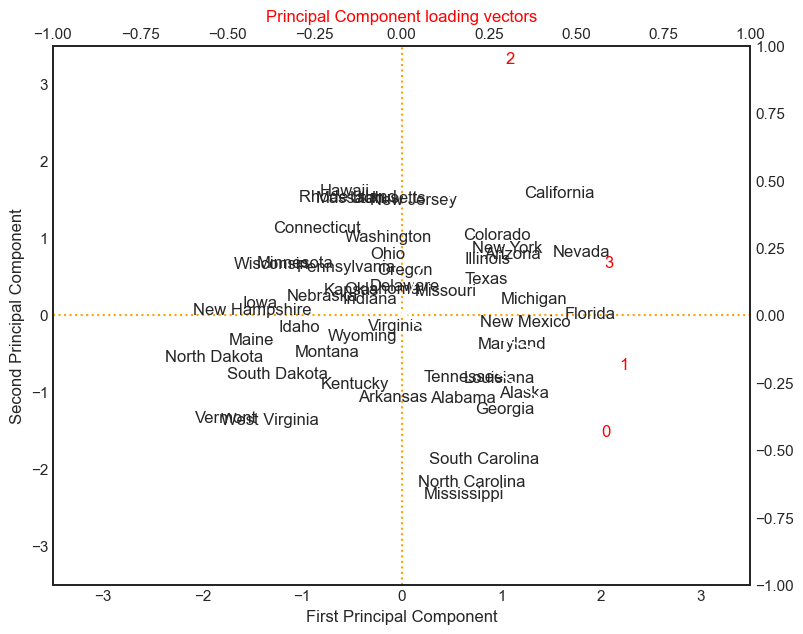

In [32]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in pca_df.index:
    ax1.annotate(i, (pca_df['PC1'].loc[i], - pca_df['PC2'].loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='orange')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='orange')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, - pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

<div class="alert alert-info">
<h3> Your turn: plot the proportion of Variance Explained by principal component </h3>

How many components do you chose? 
</div>

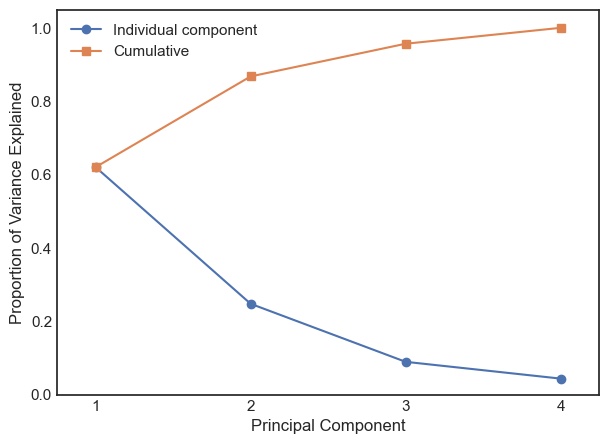

In [33]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);
plt.show()
#PCA1 is at 0 in xscale


## Clustering Methods
<html><div style='float:left'></div><hr color='#EB811B' size=1px width=796px></html>

### Generate a two-dimensional dataset containing four distinct blobs

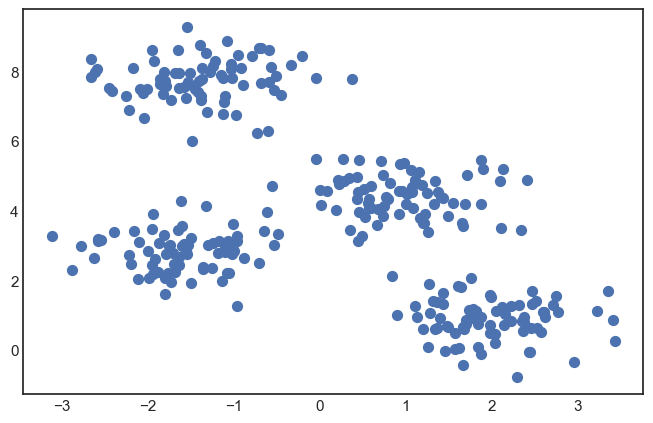

In [34]:
#from sklearn.datasets.samples_generator import make_blobs # random datapoints in 2D
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

### Means Clustering

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#y_kmeans # Each instance was assigned to one of the 4 clusters:

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
kmeans.cluster_centers_ # The 4 centroïds estimated

array([[-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263]])

## Prediction of the labels of new instances:

In [37]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 1, 3, 3], dtype=int32)

## Visualize the results

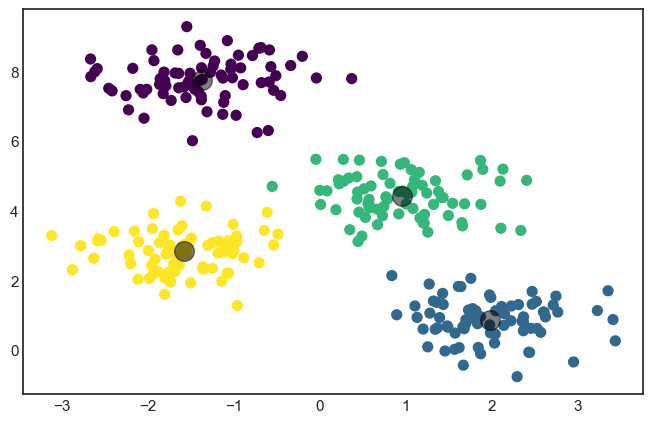

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<div class="alert alert-info">
<h3>
 Your turn: fit a `KMeans` algorithm on the same data with $6$ clusters and plot the result in 2D 
 </h3>
</div>

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



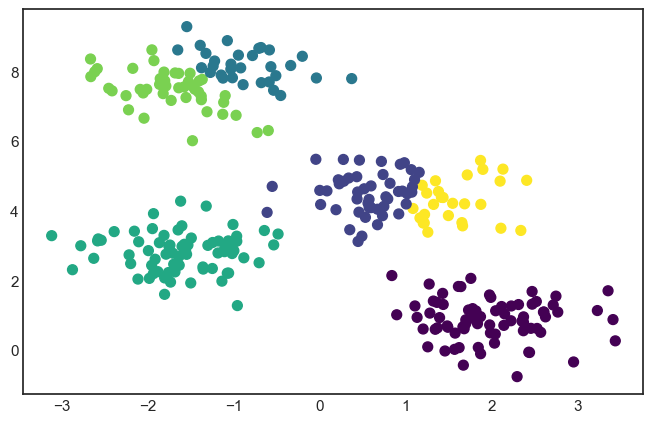

In [39]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### Finding the optimal number of clusers: Inertia

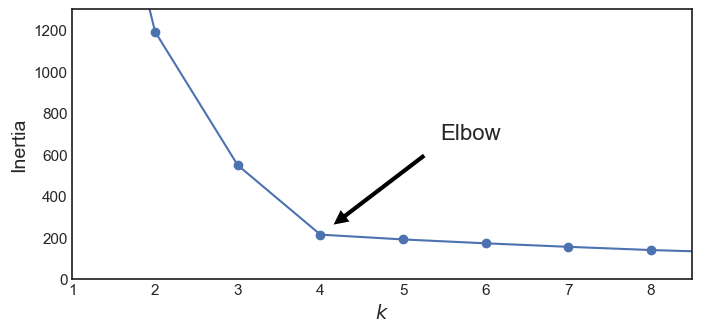

In [40]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

### Finding the optimal number of clusers: Silhouette Score

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6819938690643478

In [42]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

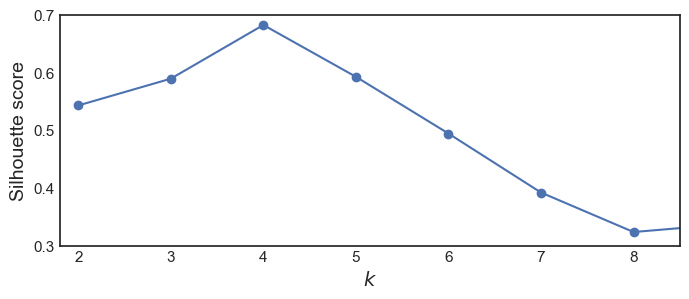

In [43]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.3, 0.7])
plt.show()

## Hierarchical Clustering
### Fitting the model

In [44]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit(X)

AgglomerativeClustering(n_clusters=5)

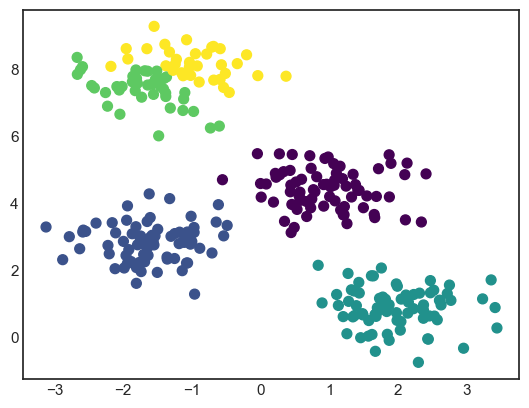

In [45]:
labels = agglo.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

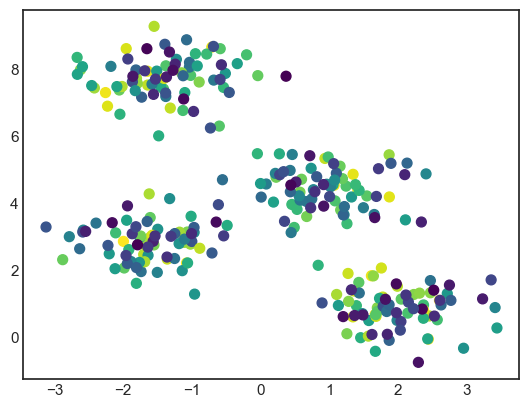

In [46]:
# setting distance_threshold=0 ensures we compute the full tree.
agglo2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo2.fit(X)
labels = agglo2.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### Dendrogram plot (with `scipy`)

We can use Scipy's `hierarchy.linkage()` to form clusters and plot them with `hierarchy.dendrogram()`:
The three big dendrograms correspond to the clusters with largest distances among them.

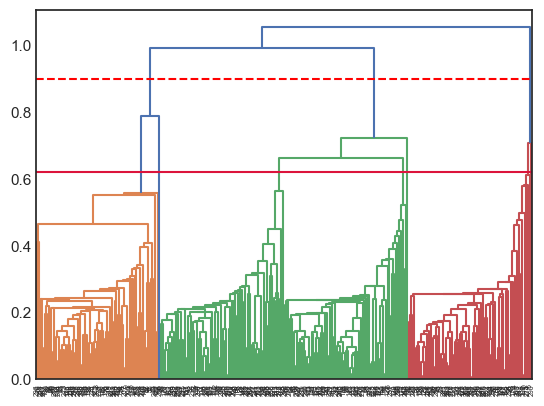

In [47]:
from scipy.cluster import hierarchy

hierarchy.dendrogram(hierarchy.linkage(X, 'single'),
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(0.9, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(.62, color='crimson'); 
plt.show()

This example shows how the Dendrogram is only a reference when used to choose the number of clusters. We already know that we have 4 clusters in the dataset, but if we were to determine their number by the Dendrogram, 3 would be our first option, and 4 would be our second option.